In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil
import shapely.geometry

# US House

## Final File - Load

In [2]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-va/vest-va-2016'

In [3]:
final = gpd.read_file('./vest_va_2016/va_2016_ushouse/va_2016_ushouse.shp')
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry
0,001,Accomack County,000101,Chincoteague,2,453,1319,0,2,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42..."
1,001,Accomack County,000201,Atlantic,2,144,643,0,2,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59..."
2,001,Accomack County,000202,Greenbackville,2,298,799,0,1,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49..."
3,001,Accomack County,000301,New Church,2,723,670,0,0,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64..."
4,001,Accomack County,000401,Bloxom,2,124,395,0,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71..."
...,...,...,...,...,...,...,...,...,...,...
2453,195,Wise County,000301,Big Stone Gap,9,479,1263,55,5,"POLYGON Z ((-82.77275 36.84962 0.00000, -82.77..."
2454,095,James City County,000202,Jamestown B (CD 2),2,8,0,0,0,"POLYGON Z ((-76.73414 37.28607 0.00000, -76.73..."
2455,095,James City County,000202,Jamestown B (CD 1),1,1242,1258,103,8,"POLYGON Z ((-76.73272 37.28612 0.00000, -76.73..."
2456,095,James City County,000504,Roberts D (CD 1),1,13,15,1,0,"POLYGON Z ((-76.74957 37.23549 0.00000, -76.74..."


# Election Results: US House

## Read in election results and append since files split accross districts

In [4]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-va/vest-va-2016'

In [5]:
district = [str(1), str(2), str(3), str(4), str(5), str(6), str(7), str(8), str(9), str(10), str(11)]

In [6]:
#Load in all results, check party by district to match for this dictionary, then reload in and rename in code
candidate_to_party_dict = {'Robert Joseph Wittman': 'G16HORREP',
                           'Matthew Dew Rowe': 'G16HORDEM', 
                           'Glenda Gail Parker': 'G16HORIND',
                           'All Others': 'G16HORWRI', 
                           'Scott William Taylor': 'G16HORREP',
                           'Shaun D. Brown': 'G16HORDEM',
                           'Robert Cortez Scott': 'G16HORDEM',
                           'Martin L. Williams': 'G16HORREP',
                           'A. Donald McEachin': 'G16HORDEM',
                           'Michael L. Wade': 'G16HORREP',
                           'Tom A. Garrett, Jr': 'G16HORREP',
                           'Jane D. Dittmar': 'G16HORDEM', 
                           'Robert William Goodlatte': 'G16HORREP',
                           'Kai Degner': 'G16HORDEM',
                           'David A. Brat': 'G16HORREP',
                           'Eileen Mcneil Bedell': 'G16HORDEM',
                           'Charles Alan Hernick': 'G16HORREP',
                           'Donald Sternoff Beyer, Jr.': 'G16HORDEM', 
                           'Julio Gracia': 'G16HORIND',
                           'Howard Morgan Griffith': 'G16HORREP',
                           'Derek W. Kitts': 'G16HORDEM', 
                           'Janice Allen Boyd': 'G16HORIND',
                           'Barbara Jean Comstock': 'G16HORREP',
                           'Luann L. Bennett': 'G16HORDEM',
                           'Gerald Edward Connolly': 'G16HORDEM'}

In [7]:
elections_by_district = []
for i in district:
    ref = './vest_va_2016/us_house_results_by_district_2016/'
    file_name = ref + 'Virginia_Elections_Database__2016_U_S_House_General_Election_District_'+ i +'_including_precincts.csv'
    results = pd.read_csv(file_name)
    print(i, ' added to list')
    results['CON_DIST'] = i
    for col in results.columns:
        if col in candidate_to_party_dict.keys():
            col_new_name = candidate_to_party_dict.get(col)
            results = results.rename(columns = {col:col_new_name})
    elections_by_district.append(results)

1  added to list
2  added to list
3  added to list
4  added to list
5  added to list
6  added to list
7  added to list
8  added to list
9  added to list
10  added to list
11  added to list


In [8]:
df = pd.concat(elections_by_district, axis = 0)
df = df.reset_index()

In [9]:
df.head()

,index,County/City,Ward,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,Total Votes Cast,CON_DIST
0,0,NaN,NaN,NaN,Republican,Democratic,Independent,NaN,NaN,1
1,1,Caroline County,-,101 - Bowling Green,739,372,32,3.0,"1,146",1
2,2,Caroline County,-,102 - Sparta,556,307,26,4.0,893,1
3,3,Caroline County,-,201 - North Madison,531,450,25,2.0,"1,008",1
4,4,Caroline County,-,202 - South Madison,750,451,48,5.0,"1,254",1


In [10]:
df = df[df['County/City'] != 'TOTALS']
df['LOCALITY'] = df['County/City']
df = df.iloc[1:]
df = df.drop(['County/City', 'Ward', 'Total Votes Cast'], axis = 1)
df = df.fillna(value = 0)
df = df[(df['G16HORDEM'] != 'Democratic') & (df['G16HORREP'] != 'Republican') & (df['G16HORIND'] != 'Independent')]
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
df['COUNTYFP'] = df['LOCALITY'].map(county_dict)

df['G16HORDEM'] = df['G16HORDEM'].map(lambda x: str(x).replace(',', ''))
df['G16HORREP'] = df['G16HORREP'].map(lambda x: str(x).replace(',', ''))
df['G16HORIND'] = df['G16HORIND'].map(lambda x: str(x).replace(',', ''))
df['G16HORWRI'] = df['G16HORWRI'].map(lambda x: str(x).replace(',', ''))

df['G16HORDEM'] = df['G16HORDEM'].astype(str).astype(float).astype(int)
df['G16HORREP'] = df['G16HORREP'].astype(str).astype(float).astype(int)
df['G16HORIND'] = df['G16HORIND'].astype(str).astype(float).astype(int)
df['G16HORWRI'] = df['G16HORWRI'].astype(str).astype(float).astype(int)

df['CON_DIST'] = df['CON_DIST'].astype(str)

In [11]:
df.head()

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP
1,1,101 - Bowling Green,739,372,32,3,1,Caroline County,033
2,2,102 - Sparta,556,307,26,4,1,Caroline County,033
3,3,201 - North Madison,531,450,25,2,1,Caroline County,033
4,4,202 - South Madison,750,451,48,5,1,Caroline County,033
5,5,301 - Port Royal,387,186,21,2,1,Caroline County,033


In [16]:
column_list = ['G16HORREP', 'G16HORDEM', 'G16HORIND', 'G16HORWRI']

In [17]:
for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

G16HORREP: EQUAL
G16HORDEM: EQUAL
G16HORIND: EQUAL
G16HORWRI: EQUAL


In [18]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(['LOCALITY']).sum()[i]-final.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


# Re allocate absentee votes

### cd with county to better reallocate absentee

In [19]:
cd_abs_prov_prec = df[((df['Pct'].map(lambda x: 'Absentee' in str(x))) &(df['Pct'].map(lambda x: 'CD' in str(x)))) | ((df['Pct'].map(lambda x: 'Provisional' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x))))]

In [20]:
county_with_cd_nec_list = list(cd_abs_prov_prec['COUNTYFP'])

In [21]:
df['Pct'].str.slice(start = -5)[df['COUNTYFP'].isin(county_with_cd_nec_list)].value_counts()

Series([], Name: Pct, dtype: int64)

In [22]:
df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP
13,13,Ab - Central Absentee Precinct,669,556,58,5,1,Caroline County,033
14,14,Provisional,5,6,0,0,1,Caroline County,033
19,19,Ab - Central Absentee Precinct,368,228,21,0,1,Essex County,057
20,20,Provisional,0,1,0,0,1,Essex County,057
25,25,Ab - Central Absentee Precinct,362,193,23,1,1,Fauquier County,061
...,...,...,...,...,...,...,...,...,...
2723,117,Provisional,0,194,0,21,11,Fairfax County,059
2730,124,Ab - Central Absentee Precinct,0,1891,0,207,11,Fairfax City,600
2731,125,Provisional,0,6,0,1,11,Fairfax City,600
2771,165,Ab - Central Absentee Precinct,0,14610,0,1181,11,Prince William County,153


In [23]:
(df['COUNTYFP'] + '-' + df['CON_DIST']).value_counts()

059-11    117
810-2     100
107-10     95
059-8      82
087-7      69
         ... 
610-8       5
830-2       4
678-6       3
530-6       3
720-9       2
Length: 149, dtype: int64

In [24]:
df['countyfp_cd'] = df['COUNTYFP'] + '-' + df['CON_DIST']

In [25]:
print(final)

     COUNTYFP           LOCALITY   VTDST            PRECINCT CON_DIST  \
0         001    Accomack County  000101        Chincoteague        2   
1         001    Accomack County  000201            Atlantic        2   
2         001    Accomack County  000202      Greenbackville        2   
3         001    Accomack County  000301          New Church        2   
4         001    Accomack County  000401              Bloxom        2   
...       ...                ...     ...                 ...      ...   
2453      195        Wise County  000301       Big Stone Gap        9   
2454      095  James City County  000202  Jamestown B (CD 2)        2   
2455      095  James City County  000202  Jamestown B (CD 1)        1   
2456      095  James City County  000504    Roberts D (CD 1)        1   
2457      095  James City County  000504    Roberts D (CD 2)        2   

      G16HORDEM  G16HORREP  G16HORIND  G16HORWRI  \
0           453       1319          0          2   
1           144    

### Actual Reallocation

In [26]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['countyfp_cd']).sum()

In [27]:
groupby_county_df_tot = df.groupby(['countyfp_cd']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('countyfp_cd').sum()

In [28]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

## PH CODE for vote allocation

#countyfp_cd
#df_no_absent_or_provisional

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row["countyfp_cd"]
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals["countyfp_cd"]==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(["countyfp_cd"]).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals["countyfp_cd"].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated["countyfp_cd"]==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

In [29]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")
        
        
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(['LOCALITY']).sum()[i]-final.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

G16HORREP: EQUAL
G16HORDEM: EQUAL
G16HORIND: EQUAL
G16HORWRI: EQUAL
Counties with differences printed below:

All other races in all counties are equal


# Shapefile

In [30]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-va/vest-va-2016'

In [31]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])

In [32]:
proj = final.crs

In [33]:
county_vtds = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [34]:
global shp
shp = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

<AxesSubplot:>

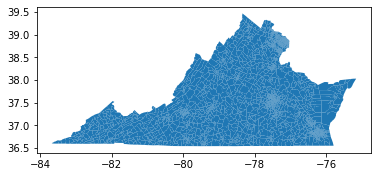

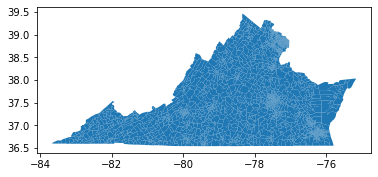

In [35]:
shp.plot()
final.plot()

In [36]:
shp['unique_id'] = shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)

### **Load in cd shp to enable splits later on**

In [37]:
county_cd = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    cd_ref = ref + i + '/PVS_19_v2_cd_' + i + '.shp' 
    cd_shp = gpd.read_file(cd_ref)
    print(i, ' added to list')
    county_cd.append(cd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [38]:
global cd
cd = gpd.GeoDataFrame(pd.concat(county_cd, axis = 0) , crs = proj) 

<AxesSubplot:>

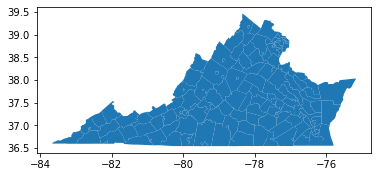

In [39]:
cd.plot()

<AxesSubplot:>

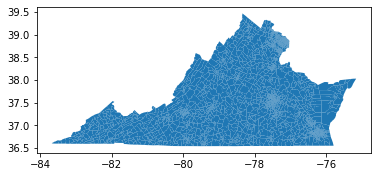

In [40]:
overlay = gpd.overlay(cd, shp, how = 'intersection', make_valid = True, keep_geom_type = True)
overlay.plot()

In [41]:
shp['unique_id'].shape

(2462,)

# Unique ID Across Files

In [42]:
shp.shape

(2462, 17)

In [43]:
final.shape

(2458, 10)

In [44]:
df_with_absentee_reallocated.shape

(2461, 22)

In [45]:
(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)).nunique()

2435

In [46]:
len(set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set(shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)))

24

In [47]:
(df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3)).nunique()

2434

In [48]:
len(set((df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3))) - set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)))

360

In [49]:
len(set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set((df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3))))

361

In [50]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)

In [51]:
#Make election df format match VEST's 
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [52]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated[df_with_absentee_reallocated['vtdst'].str.slice(start = -1) == '-'] 

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_add,G16HORDEM_rem,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst


In [53]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']

In [54]:
set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set((df_with_absentee_reallocated['unique_id']))

{'059700'}

In [55]:
final['unique_id'] = final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)

In [56]:
final['unique_id'].nunique()

2435

In [57]:
df_with_absentee_reallocated['unique_id_1'] = df_with_absentee_reallocated['unique_id'] + '-' + df_with_absentee_reallocated['CON_DIST']
final['unique_id_1'] = final['unique_id'] + '-' + final['CON_DIST']

In [58]:
final['unique_id_1'].nunique()

2458

In [59]:
df_with_absentee_reallocated['unique_id_1'].nunique()

2461

In [60]:
set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1'])

{'059700-11'}

In [61]:
set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1'])

{'059925-11', '550019-3', '550045-3', '800403-3'}

In [62]:
len(set(shp['unique_id']) - set(final['unique_id']))

50

In [63]:
len(set(final['unique_id']) - set(shp['unique_id']))

24

In [64]:
df_id_count = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = df_id_count[df_id_count > 1].index
final_id_count = final.unique_id.value_counts()
final_double_list = final_id_count[final_id_count > 1].index
print('Double in df, not in final: ', set(df_double_list) - set(final_double_list))
print('Double in final, not in df: ',set(final_double_list) - set(df_double_list))
print(df_double_list)

Double in df, not in final:  {'800403', '550019', '550045', '059925'}
Double in final, not in df:  set()
Index(['153609', '177702', '153110', '800403', '177402', '177704', '800404',
       '710104', '059925', '153210', '650215', '177703', '095202', '800602',
       '710101', '550020', '800302', '095504', '800504', '550045', '089304',
       '059513', '177103', '550019', '153112', '153312', '089505'],
      dtype='object')


In [65]:
df_with_absentee_reallocated[df_with_absentee_reallocated.unique_id.isin(set(df_double_list) - set(final_double_list))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
467,11,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,019,550019,550019-3
485,29,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,045,550045,550045-3
667,211,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,403,800403,800403-3
693,14,19 - Jolliff,973.0,393.0,0.0,9.0,4,Chesapeake City,550,550-4,...,73.0,0.0,0.0,0.0,1.0,0.339901,1.0,019,550019,550019-4
703,24,45 - Sunray II,262.0,412.0,0.0,6.0,4,Chesapeake City,550,550-4,...,77.0,0.0,0.0,0.0,1.0,0.837438,0.0,045,550045,550045-4
924,245,403 - Southside,98.0,742.0,0.0,0.0,4,Suffolk City,800,800-4,...,127.0,0.0,0.0,0.0,0.0,0.000000,0.0,403,800403,800403-4
2441,53,925 - Old Mill,702.0,926.0,0.0,5.0,10,Fairfax County,059,059-10,...,264.0,0.0,0.0,0.0,1.0,0.337580,1.0,925,059925,059925-10
2719,113,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,925,059925,059925-11


In [66]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '800403']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
667,211,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,403,800403,800403-3
924,245,403 - Southside,98.0,742.0,0.0,0.0,4,Suffolk City,800,800-4,...,127.0,0.0,0.0,0.0,0.0,0.0,0.0,403,800403,800403-4


In [67]:
final[(final['COUNTYFP'] == '800') &  (final['PRECINCT'].str.contains('SOUTH'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
2061,800,Suffolk City,000403,SOUTHSIDE,4,742,98,0,0,"POLYGON Z ((-76.62006 36.71008 0.00000, -76.62...",800403,800403-4


In [68]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '550045']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
485,29,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,045,550045,550045-3
703,24,45 - Sunray II,262.0,412.0,0.0,6.0,4,Chesapeake City,550,550-4,...,77.0,0.0,0.0,0.0,1.0,0.837438,0.0,045,550045,550045-4


In [69]:
final[(final['COUNTYFP'] == '550') &  (final['PRECINCT'].str.contains('C'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
1655,550,Chesapeake City,000003,Camelot,3,2107,158,0,4,"POLYGON Z ((-76.36447 36.77827 0.00000, -76.36...",550003,550003-3
1658,550,Chesapeake City,000036,Great Bridge Baptist Church,4,354,710,0,6,"POLYGON Z ((-76.26309 36.66071 0.00000, -76.26...",550036,550036-4
1659,550,Chesapeake City,000043,Pleasant Crossing,4,387,1215,0,3,"POLYGON Z ((-76.23986 36.72091 0.00000, -76.23...",550043,550043-4
1661,550,Chesapeake City,000004,Churchland,3,490,1000,0,1,"POLYGON Z ((-76.40935 36.83620 0.00000, -76.40...",550004,550004-3
1665,550,Chesapeake City,000005,Crestwood,3,1550,216,0,4,"POLYGON Z ((-76.29859 36.76704 0.00000, -76.29...",550005,550005-3
1666,550,Chesapeake City,000006,Deep Creek,4,1573,1755,0,13,"POLYGON Z ((-76.49148 36.55072 0.00000, -76.48...",550006,550006-4
1667,550,Chesapeake City,000017,Indian Creek,4,285,1130,0,6,"POLYGON Z ((-76.21181 36.61671 0.00000, -76.21...",550017,550017-4
1677,550,Chesapeake City,000038,Bailey Creek,3,496,1186,0,3,"POLYGON Z ((-76.44289 36.81667 0.00000, -76.44...",550038,550038-3
1680,550,Chesapeake City,000031,Carver School,3,1660,296,0,7,"POLYGON Z ((-76.28548 36.77660 0.00000, -76.28...",550031,550031-3
1700,550,Chesapeake City,000051,Coopers Way,4,497,1812,0,6,"POLYGON Z ((-76.23300 36.69624 0.00000, -76.23...",550051,550051-4


In [70]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '059925']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
2441,53,925 - Old Mill,702.0,926.0,0.0,5.0,10,Fairfax County,059,059-10,...,264.0,0.0,0.0,0.0,1.0,0.33758,1.0,925,059925,059925-10
2719,113,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,925,059925,059925-11


In [71]:
df_with_absentee_reallocated[(df_with_absentee_reallocated['COUNTYFP'] == '059') & (df_with_absentee_reallocated['Pct'].str.contains('Fair'))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
1923,104,413 - Fairfield,221.0,1451.0,115.0,5.0,8,Fairfax County,059,059-8,...,339.0,18.0,0.074435,18.0,1.0,0.976623,0.0,413,059413,059413-8
2416,28,805 - Fairfax Station,742.0,592.0,0.0,3.0,10,Fairfax County,059,059-10,...,168.0,0.0,0.000000,0.0,1.0,0.668790,0.0,805,059805,059805-10
2608,2,105 - Fairview,0.0,2452.0,0.0,562.0,11,Fairfax County,059,059-11,...,559.0,0.0,0.000000,0.0,106.0,0.973412,105.0,105,059105,059105-11
2709,103,843 - Fair Lakes,0.0,1724.0,0.0,214.0,11,Fairfax County,059,059-11,...,393.0,0.0,0.000000,0.0,40.0,0.437223,40.0,843,059843,059843-11
2712,106,848 - Fair Oaks,0.0,1832.0,0.0,153.0,11,Fairfax County,059,059-11,...,417.0,0.0,0.000000,0.0,29.0,0.817331,28.0,848,059848,059848-11


In [72]:
final[(final['COUNTYFP'] == '059') &  (final['PRECINCT'].str.contains('Fair'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
415,059,Fairfax County,000105,Fairview,11,2453,0,0,563,"POLYGON Z ((-77.32665 38.78832 0.00000, -77.32...",059105,059105-11
504,059,Fairfax County,000413,Fairfield,8,1451,221,115,5,"POLYGON Z ((-77.10620 38.74253 0.00000, -77.10...",059413,059413-8
584,059,Fairfax County,000700,Fairfax Court,11,0,0,0,0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,059700-11
598,059,Fairfax County,000805,Fairfax Station,10,592,742,0,3,"POLYGON Z ((-77.36234 38.78983 0.00000, -77.36...",059805,059805-10
613,059,Fairfax County,000843,Fair Lakes,11,1725,0,0,214,"POLYGON Z ((-77.40756 38.86820 0.00000, -77.40...",059843,059843-11
618,059,Fairfax County,000848,Fair Oaks,11,1832,0,0,153,"POLYGON Z ((-77.40483 38.84011 0.00000, -77.40...",059848,059848-11


In [73]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '550019']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
467,11,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,019,550019,550019-3
693,14,19 - Jolliff,973.0,393.0,0.0,9.0,4,Chesapeake City,550,550-4,...,73.0,0.0,0.0,0.0,1.0,0.339901,1.0,019,550019,550019-4


In [74]:
final[(final['COUNTYFP'] == '550') &  (final['PRECINCT'].str.contains('Jo'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
1668,550,Chesapeake City,000041,John T West,4,1367,1379,0,16,"POLYGON Z ((-76.35790 36.69384 0.00000, -76.35...",550041,550041-4
1679,550,Chesapeake City,000026,Johnson Park,3,585,283,0,2,"POLYGON Z ((-76.29214 36.79866 0.00000, -76.29...",550026,550026-3
1688,550,Chesapeake City,000019,Jolliff,4,393,973,0,9,"POLYGON Z ((-76.46335 36.77079 0.00000, -76.46...",550019,550019-4
1698,550,Chesapeake City,000048,Jolliff Middle School,4,1670,343,0,13,"POLYGON Z ((-76.43419 36.79527 0.00000, -76.43...",550048,550048-4


**df/final unique id changes/missing items**
- 800403-3 does exist in final - merge with -4 in df
- 550045 does NOT exist in final
- 059925 Old mill does NOT exist in final
- 059700 does NOT exist in df, but has 0 votes
- 550019 does exist in final - merge in df, then unique_id_1 = 550019-4


In [75]:
# make new column with unique id then replace items with _1 where in final_double_list, then the remaining double items, dissolve
df_with_absentee_reallocated['unique_id_2'] = df_with_absentee_reallocated['unique_id']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list), 'unique_id_1']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list)]


,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1,unique_id_2
88,88,202 - Jamestown B,1259.0,1242.0,103.0,8.0,1,James City County,095,095-1,...,15.0,0.158382,15.0,2.0,0.052632,2.0,202,095202,095202-1,095202-1
98,98,504 - Roberts D,15.0,13.0,1.0,0.0,1,James City County,095,095-1,...,0.0,0.172254,0.0,0.0,0.000000,0.0,504,095504,095504-1,095504-1
173,173,110 - Buckland Mills,298.0,211.0,11.0,1.0,1,Prince William County,153,153-1,...,2.0,0.381257,2.0,0.0,0.415789,0.0,110,153110,153110-1,153110-1
175,175,112 - Burke-nickens,41.0,25.0,4.0,0.0,1,Prince William County,153,153-1,...,1.0,0.793752,0.0,0.0,0.000000,0.0,112,153112,153112-1,153112-1
183,183,210 - Penn,1167.0,714.0,61.0,6.0,1,Prince William County,153,153-1,...,13.0,0.700038,12.0,2.0,0.663158,1.0,210,153210,153210-1,153210-1
193,193,312 - Triangle,145.0,301.0,27.0,7.0,1,Prince William County,153,153-1,...,6.0,0.556266,5.0,2.0,0.078947,2.0,312,153312,153312-1,153312-1
205,205,609 - King,0.0,0.0,0.0,0.0,1,Prince William County,153,153-1,...,0.0,0.000000,0.0,0.0,0.000000,0.0,609,153609,153609-1,153609-1
215,215,103 - Travelers Rest,27.0,17.0,1.0,0.0,1,Spotsylvania County,177,177-1,...,0.0,0.174603,0.0,0.0,0.000000,0.0,103,177103,177103-1,177103-1
218,218,402 - Parkside,1113.0,964.0,58.0,4.0,1,Spotsylvania County,177,177-1,...,9.0,0.555556,8.0,1.0,0.576923,0.0,402,177402,177402-1,177402-1
221,221,702 - Brents Mill,729.0,597.0,66.0,2.0,1,Spotsylvania County,177,177-1,...,10.0,0.777778,9.0,0.0,0.384615,0.0,702,177702,177702-1,177702-1


In [76]:
final['unique_id_2'] = final['unique_id']
final.loc[final['unique_id'].isin(final_double_list), 'unique_id_2'] = final.loc[final['unique_id'].isin(final_double_list), 'unique_id_1']
final.loc[final['unique_id'].isin(final_double_list)]

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
1766,650,Hampton City,000215,TYLER (CD 3),3,509,86,0,1,"POLYGON Z ((-76.36283 37.05127 0.00000, -76.36...",650215,650215-3,650215-3
2174,550,Chesapeake City,000020,E W Chittum (CD 4),4,797,1289,0,12,"POLYGON Z ((-76.43452 36.81465 0.00000, -76.43...",550020,550020-4,550020-4
2175,550,Chesapeake City,000020,E W Chittum (CD 3),3,1,10,0,1,"MULTIPOLYGON Z (((-76.41226 36.80753 0.00000, ...",550020,550020-3,550020-3
2176,059,Fairfax County,000513,Saint Albans (CD 8),8,421,231,23,0,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513,059513-8,059513-8
2177,059,Fairfax County,000513,Saint Albans (CD 11),11,880,0,0,102,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513,059513-11,059513-11
2180,650,Hampton City,000215,TYLER (CD 2),2,22,11,0,0,"POLYGON Z ((-76.36144 37.05458 0.00000, -76.35...",650215,650215-2,650215-2
2198,710,Norfolk City,000101,Granby (CD 3),3,1489,703,0,6,"POLYGON Z ((-76.28824 36.91625 0.00000, -76.28...",710101,710101-3,710101-3
2199,710,Norfolk City,000104,Titustown (CD 3),3,500,42,0,3,"POLYGON Z ((-76.28979 36.91112 0.00000, -76.28...",710104,710104-3,710104-3
2201,153,Prince William County,000210,Penn (CD 1),1,714,1167,61,6,"POLYGON Z ((-77.42210 38.70395 0.00000, -77.42...",153210,153210-1,153210-1
2202,153,Prince William County,000210,Penn (CD 11),11,124,0,0,18,"POLYGON Z ((-77.38312 38.67447 0.00000, -77.38...",153210,153210-11,153210-11


### how to easily merge rows//come back to after sorting out shp matches ^

In [77]:
set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1)

{'059925-11', '550019-3', '550045-3', '800403-3'}

In [78]:
set(final.unique_id_1) - set(df_with_absentee_reallocated.unique_id_1)

{'059700-11'}

In [79]:
set(final.unique_id_2) - set(df_with_absentee_reallocated.unique_id_2)

{'059700'}

In [80]:
final[final.unique_id == '059700']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
584,059,Fairfax County,000700,Fairfax Court,11,0,0,0,0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,059700-11,059700


In [81]:
set(df_with_absentee_reallocated.unique_id_2) - set(final.unique_id_2) # great!

set()

In [82]:
set(final.unique_id_2) - set(df_with_absentee_reallocated.unique_id_2)

{'059700'}

In [83]:
final.unique_id_2.nunique()

2458

In [84]:
df_with_absentee_reallocated.unique_id_2.nunique()

2457

In [85]:
df_with_absentee_reallocated.unique_id_2.shape[0]

2461

In [86]:
final.unique_id_2.shape[0]

2458

In [87]:
print(len(set(shp.unique_id) - set(final.unique_id_2))) #comparing with final so I can compare geometries in addition to precinct names
print(len(set(final.unique_id_2) - set(shp.unique_id)))

73
70


<AxesSubplot:>

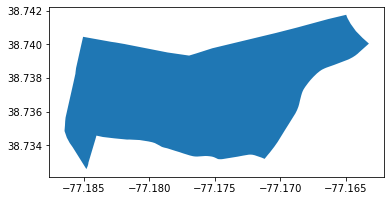

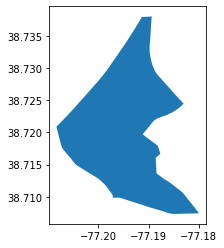

In [88]:
#Example of comparing individual precinct id to test for match
shp[(shp['unique_id'] == '059630')].plot()
final[(final['unique_id_2'] == '059625')].plot()

In [89]:
df_with_absentee_reallocated['unique_id_2'] = df_with_absentee_reallocated['unique_id']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list), 'unique_id_1']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list)]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1,unique_id_2
88,88,202 - Jamestown B,1259.0,1242.0,103.0,8.0,1,James City County,095,095-1,...,15.0,0.158382,15.0,2.0,0.052632,2.0,202,095202,095202-1,095202-1
98,98,504 - Roberts D,15.0,13.0,1.0,0.0,1,James City County,095,095-1,...,0.0,0.172254,0.0,0.0,0.000000,0.0,504,095504,095504-1,095504-1
173,173,110 - Buckland Mills,298.0,211.0,11.0,1.0,1,Prince William County,153,153-1,...,2.0,0.381257,2.0,0.0,0.415789,0.0,110,153110,153110-1,153110-1
175,175,112 - Burke-nickens,41.0,25.0,4.0,0.0,1,Prince William County,153,153-1,...,1.0,0.793752,0.0,0.0,0.000000,0.0,112,153112,153112-1,153112-1
183,183,210 - Penn,1167.0,714.0,61.0,6.0,1,Prince William County,153,153-1,...,13.0,0.700038,12.0,2.0,0.663158,1.0,210,153210,153210-1,153210-1
193,193,312 - Triangle,145.0,301.0,27.0,7.0,1,Prince William County,153,153-1,...,6.0,0.556266,5.0,2.0,0.078947,2.0,312,153312,153312-1,153312-1
205,205,609 - King,0.0,0.0,0.0,0.0,1,Prince William County,153,153-1,...,0.0,0.000000,0.0,0.0,0.000000,0.0,609,153609,153609-1,153609-1
215,215,103 - Travelers Rest,27.0,17.0,1.0,0.0,1,Spotsylvania County,177,177-1,...,0.0,0.174603,0.0,0.0,0.000000,0.0,103,177103,177103-1,177103-1
218,218,402 - Parkside,1113.0,964.0,58.0,4.0,1,Spotsylvania County,177,177-1,...,9.0,0.555556,8.0,1.0,0.576923,0.0,402,177402,177402-1,177402-1
221,221,702 - Brents Mill,729.0,597.0,66.0,2.0,1,Spotsylvania County,177,177-1,...,10.0,0.777778,9.0,0.0,0.384615,0.0,702,177702,177702-1,177702-1


In [90]:
#important
# mimmick changes in final file so that can join on unique id later
final['unique_id_2'] = final['unique_id']
final.loc[final['unique_id'].isin(df_double_list), 'unique_id_2'] = final.loc[final['unique_id'].isin(df_double_list), 'unique_id_1']
final.loc[final['unique_id'].isin(df_double_list)]

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
638,059,Fairfax County,000925,Old Mill,10,926,703,0,5,"POLYGON Z ((-77.47726 38.81506 0.00000, -77.47...",059925,059925-10,059925-10
1688,550,Chesapeake City,000019,Jolliff,4,393,973,0,9,"POLYGON Z ((-76.46335 36.77079 0.00000, -76.46...",550019,550019-4,550019-4
1696,550,Chesapeake City,000045,Sunray II,4,413,262,0,6,"POLYGON Z ((-76.42973 36.76676 0.00000, -76.42...",550045,550045-4,550045-4
1766,650,Hampton City,000215,TYLER (CD 3),3,509,86,0,1,"POLYGON Z ((-76.36283 37.05127 0.00000, -76.36...",650215,650215-3,650215-3
2061,800,Suffolk City,000403,SOUTHSIDE,4,742,98,0,0,"POLYGON Z ((-76.62006 36.71008 0.00000, -76.62...",800403,800403-4,800403-4
2174,550,Chesapeake City,000020,E W Chittum (CD 4),4,797,1289,0,12,"POLYGON Z ((-76.43452 36.81465 0.00000, -76.43...",550020,550020-4,550020-4
2175,550,Chesapeake City,000020,E W Chittum (CD 3),3,1,10,0,1,"MULTIPOLYGON Z (((-76.41226 36.80753 0.00000, ...",550020,550020-3,550020-3
2176,059,Fairfax County,000513,Saint Albans (CD 8),8,421,231,23,0,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513,059513-8,059513-8
2177,059,Fairfax County,000513,Saint Albans (CD 11),11,880,0,0,102,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513,059513-11,059513-11
2180,650,Hampton City,000215,TYLER (CD 2),2,22,11,0,0,"POLYGON Z ((-76.36144 37.05458 0.00000, -76.35...",650215,650215-2,650215-2


In [91]:
shp['unique_id_1'] = shp['unique_id']
shp.loc[shp['unique_id'].isin(merge_dict.keys()), 'unique_id_1'] = shp.loc[shp['unique_id'].isin(merge_dict.keys()), 'unique_id_1'].map(merge_dict)
shp.loc[shp['unique_id'].isin(merge_dict.keys())]

NameError: name 'merge_dict' is not defined

In [92]:
#important
shp = shp.dissolve(by = 'unique_id_1', as_index = False)

In [93]:
df_dict_unique_id = pd.Series(df_with_absentee_reallocated['unique_id_2'].values, index = df_with_absentee_reallocated['unique_id']).to_dict()
shp.loc[shp['unique_id'].isin(df_double_list), 'unique_id_1'] = shp.loc[shp['unique_id'].isin(df_double_list), 'unique_id_1'].map(df_dict_unique_id)
shp.loc[shp['unique_id'].isin(df_double_list)]

,unique_id_1,geometry,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,unique_id
573,059513-11,"POLYGON Z ((-77.18824 38.83886 0.00000, -77.18...",51,059,000513,Saint Albans Voting District,A,V2,None,None,None,None,Saint Albans,90,N,None,G5240,059513
690,059925-11,"POLYGON Z ((-77.47726 38.81506 0.00000, -77.47...",51,059,000925,Old Mill Voting District,A,V2,None,None,None,None,Old Mill,90,N,None,G5240,059925
988,089304-9,"POLYGON Z ((-79.84408 36.67143 0.00000, -79.84...",51,089,000304,Mount Olivet Voting District,A,V2,None,None,None,None,Mount Olivet,90,N,None,G5240,089304
998,089505-9,"POLYGON Z ((-79.87521 36.74426 0.00000, -79.87...",51,089,000505,Dyers Store Voting District,A,V2,None,None,None,None,Dyers Store,90,N,None,G5240,089505
1029,095202-2,"POLYGON Z ((-76.76582 37.25351 0.00000, -76.76...",51,095,000202,Jamestown B,A,00,None,None,None,None,Jamestown B,90,N,None,G5240,095202
1042,095504-2,"POLYGON Z ((-76.76726 37.22034 0.00000, -76.76...",51,095,000504,Roberts D,A,00,None,None,None,None,Roberts D,90,N,None,G5240,095504
1409,153110-10,"POLYGON Z ((-77.65761 38.78222 0.00000, -77.65...",51,153,000110,Buckland Mills Voting District,A,V2,None,None,None,None,Buckland Mills,90,N,None,G5240,153110
1411,153112-10,"POLYGON Z ((-77.70994 38.82376 0.00000, -77.70...",51,153,000112,Burke-Nickens Voting District,A,V2,None,None,None,None,Burke-Nickens,90,N,None,G5240,153112
1422,153210-11,"POLYGON Z ((-77.43063 38.69588 0.00000, -77.43...",51,153,000210,Penn Voting District,A,V2,None,None,None,None,Penn,90,N,None,G5240,153210
1439,153312-11,"POLYGON Z ((-77.33558 38.54559 0.00000, -77.33...",51,153,000312,Triangle Voting District,A,V2,None,None,None,None,Triangle,90,N,None,G5240,153312


In [94]:
#important
merge_df_list = ['153109-1', #? do not look like they matchPiney Branch
'153106-1', #Westgate part 1 -- on map looks like it this is the only match ?merge
'153106-1', #?merge Westgate part 2 -- westgate is normal Polygon z in final file
 #: 153315 - Williams voting District from shp does not seem to have a match in df
'191702-9', #merge Wallace part 1
'191702-9', #merge Wallace part 2 -- multipolygon in final file - merge shp
'760114-4', #? does not look like it matches based on polygons only one that contains 4 that is not in shp file also??
 #no match in 760 county for : 760215 from shp dataset
 #no match in 750 county for : '750004'
'685003-10', #merge Precint three part 1
'685003-10', #merge Precinct three part 2
 #: 059700 -- no match - in Final and shp, not in df -- zero votes
'095104-2', #merge Berkeley part 1
'095104-2', #merge Berkeley part 2
'161405-6', # merge with exsiting 161405 "North LINDENWOOD" with this "South LINDENWOOD"
'550006-4', # merge Deep creek II -- merge with existing 550006
'550049-4', # merge Waterway II -- merge with exisiting 550049
'041111-4', 
'077401-9',
 '077401-9',

'520004-9',
'520004-9', 
'121203-9'
             ] 

In [95]:
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_df_list), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_df_list), 'unique_id_1']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_df_list)]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1,unique_id_2
169,169,106 - Westgate,498.0,1194.0,130.0,11.0,1,Prince William County,153,153-1,...,27.0,0.252164,27.0,3.0,0.326316,3.0,106,153106,153106-1,153106-1
172,172,109 - Piney Branch,1110.0,1272.0,106.0,10.0,1,Prince William County,153,153-1,...,22.0,0.225066,22.0,3.0,0.910526,2.0,109,153109,153109-1,153109-1
295,29,104- Berkeley D,456.0,376.0,0.0,0.0,2,James City County,095,095-2,...,0.0,0.000000,0.0,0.0,0.000000,0.0,104,095104,095104-2,095104-2
687,8,6 - Deep Creek,1755.0,1573.0,0.0,13.0,4,Chesapeake City,550,550-4,...,0.0,0.000000,0.0,2.0,0.842365,1.0,006,550006,550006-4,550006-4
707,28,49 - Waterway,1881.0,1327.0,0.0,15.0,4,Chesapeake City,550,550-4,...,0.0,0.000000,0.0,2.0,0.177340,2.0,049,550049,550049-4,550049-4
728,49,111 - Iron Bridge,2007.0,1565.0,0.0,6.0,4,Chesterfield County,041,041-4,...,0.0,0.000000,0.0,1.0,0.662651,0.0,111,041111,041111-4,041111-4
846,167,114 - One Hundred Fourteen,622.0,1424.0,0.0,13.0,4,Richmond City,760,760-4,...,0.0,0.000000,0.0,1.0,0.650000,0.0,114,760114,760114-4,760114-4
1450,139,405 - Lindenwood,2129.0,762.0,0.0,1.0,6,Roanoke County,161,161-6,...,0.0,0.000000,0.0,0.0,0.120482,0.0,405,161405,161405-6,161405-6
2018,27,4 - Fourth Ward,2070.0,655.0,66.0,6.0,9,Bristol City,520,520-9,...,7.0,0.142105,7.0,1.0,0.666667,0.0,004,520004,520004-9,520004-9
2123,132,401 - Fries,285.0,127.0,20.0,0.0,9,Grayson County,077,077-9,...,3.0,0.348485,3.0,0.0,0.000000,0.0,401,077401,077401-9,077401-9


In [96]:
len(set(shp.unique_id_1) - set(df_with_absentee_reallocated['unique_id_2']))

58

In [97]:
shp

,unique_id_1,geometry,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,unique_id
0,001101,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42...",51,001,000101,Chincoteague Voting District,A,V2,None,None,None,None,Chincoteague,90,N,None,G5240,001101
1,001201,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59...",51,001,000201,Atlantic Voting District,A,V2,None,None,None,None,Atlantic,90,N,None,G5240,001201
2,001202,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49...",51,001,000202,Greenbackville Voting District,A,V2,None,None,None,None,Greenbackville,90,N,None,G5240,001202
3,001301,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64...",51,001,000301,New Church Voting District,A,V2,None,None,None,None,New Church,90,N,None,G5240,001301
4,001401,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71...",51,001,000401,Bloxom Voting District,A,V2,None,None,None,None,Bloxom,90,N,None,G5240,001401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,840102,"POLYGON Z ((-78.19726 39.19114 0.00000, -78.19...",51,840,000102,Old Town Voting District,A,V2,None,None,None,None,Old Town,90,N,None,G5240,840102
2457,840201,"POLYGON Z ((-78.16816 39.17746 0.00000, -78.16...",51,840,000201,Virginia Avenue Voting District,A,V2,None,None,None,None,Virginia Avenue,90,N,None,G5240,840201
2458,840301,"POLYGON Z ((-78.18626 39.13912 0.00000, -78.18...",51,840,000301,War Memorial Voting District,A,V2,None,None,None,None,War Memorial,90,N,None,G5240,840301
2459,840401,"POLYGON Z ((-78.19052 39.14111 0.00000, -78.19...",51,840,000401,Frederick Douglass Voting District,A,V2,None,None,None,None,Frederick Douglass,90,N,None,G5240,840401


# Testing with overlay

In [98]:
overlay['unique_id'] = overlay['COUNTYFP_1'] + overlay['VTDST'].str.slice(start = 3) 

In [99]:
overlay['unique_id'].nunique()

2461

In [100]:
overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)
overlay_w_shp.shape

<ipython-input-100-7a853ff08c61>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)


(2545, 60)

In [101]:
overlay_w_shp['geometry'] = overlay_w_shp['geometry_x']
overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry'] = overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry_y']

In [102]:
overlay_w_shp = overlay_w_shp.drop(['geometry_x', 'geometry_y'], axis = 1)

In [103]:
overlay_w_shp['unique_id'].nunique()

2461

In [104]:
final.shape

(2458, 13)

In [105]:
overlay.shape

(2545, 43)

In [106]:
cd.shape

(149, 27)

In [107]:
overlay.CDFP.str.lstrip('0')

0        9
1        9
2        9
3        9
4        9
        ..
2540    11
2541    11
2542    11
2543    11
2544    11
Name: CDFP, Length: 2545, dtype: object

In [108]:
overlay_w_shp['unique_id_1'] = overlay_w_shp['unique_id'] + '-' + overlay_w_shp['CDFP'].str.lstrip('0')

In [109]:
len(set(final.unique_id_1) - set(overlay_w_shp.unique_id_1))

26

In [110]:
overlay_w_shp['unique_id_2'] = overlay_w_shp['unique_id']
overlay_w_shp.loc[overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_2'] = overlay_w_shp.loc[overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_1']

In [111]:
len( set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

52

In [112]:
len(set(df_with_absentee_reallocated.unique_id_2) -  set(overlay_w_shp.unique_id_2) )

36

In [113]:
len( set(overlay_w_shp.unique_id_1) - set(final.unique_id_1))

112

In [114]:
len(set(final.unique_id_1) -  set(overlay_w_shp.unique_id_1))

26

In [115]:
set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1)

{'059925-11', '550019-3', '550045-3', '800403-3'}

In [116]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id_1'].isin(set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1,unique_id_2
467,11,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.0,019,550019,550019-3,550019-3
485,29,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.0,045,550045,550045-3,550045-3
667,211,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,...,0.0,0.0,0.0,0.0,0.0,0.0,403,800403,800403-3,800403-3
2719,113,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,...,0.0,0.0,0.0,0.0,0.0,0.0,925,059925,059925-11,059925-11


In [117]:
overlay_w_shp.unique_id_1.nunique()

2544

In [118]:
overlay_w_shp.shape

(2545, 60)

<AxesSubplot:>

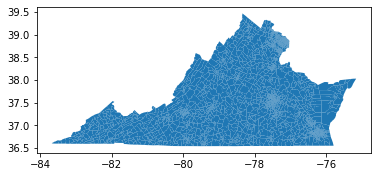

In [119]:
overlay_w_shp['geometry'].plot()

In [120]:
overlay_w_shp.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP', 'NAMELSAD_1', 'LSAD_1',
       'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'CDSESSN',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2',
       'VTDST_x', 'NAMELSAD_2', 'VTDI_x', 'LSAD_2', 'CHNG_TYPE_2',
       'ORIG_NAME_x', 'ORIG_CODE_x', 'RELATE_2', 'NAME_2', 'VINTAGE_2',
       'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC_x', 'unique_id', 'unique_id_1',
       'STATEFP', 'COUNTYFP', 'VTDST_y', 'NAMELSAD', 'VTDI_y', 'LSAD',
       'CHNG_TYPE', 'ORIG_NAME_y', 'ORIG_CODE_y', 'RELATE', 'NAME', 'VINTAGE',
       'FUNCSTAT', 'JUSTIFY', 'MTFCC_y', 'geometry', 'unique_id_2'],
      dtype='object')

<AxesSubplot:>

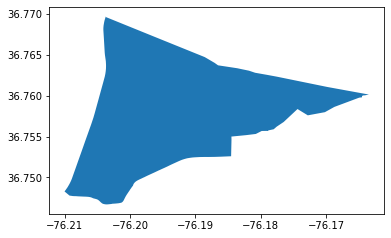

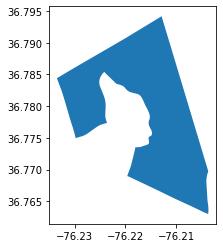

In [121]:
overlay_w_shp['geometry'][(overlay_w_shp['unique_id_2'] == '550065')].plot() #looks like it could be bottom sliver of final id
final[final['unique_id_2'] == '550040'].plot()

In [122]:
overlay_w_shp_to_df_dict = {
    '059925-10': '059925',
    '077011': '077401',
    '077012': '077401',
    '095041': '095104',
    '095042-2': '095104',
    '107422': '107419',
    '153061': '153106',
    '191021': '191702',
    '191022': '191702',
    '520041':  '520004',
    '520042':  '520004',
    '550019-4': '550019',
    '550045-4': '550045',
    '685031': '685003',
    '685032': '685003',
    '800403-4': '800403'
}

In [123]:
overlay_w_shp.loc[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_2'] = overlay_w_shp.loc[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_2'].map(overlay_w_shp_to_df_dict)

In [124]:
overlay_w_shp[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys())]

,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,...,ORIG_NAME_y,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,geometry,unique_id_2


In [125]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

45

In [126]:
len(set(final.unique_id_2) - set(overlay_w_shp.unique_id_2))

23

In [127]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

45

<AxesSubplot:>

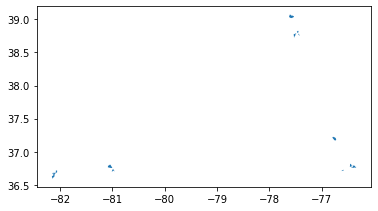

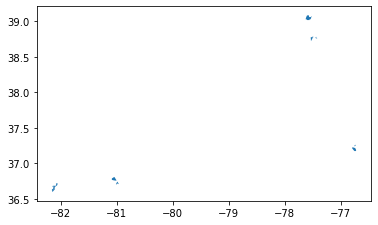

In [128]:
overlay_w_shp['geometry'][overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.values())].plot()
final[final['unique_id_2'].isin(overlay_w_shp_to_df_dict.values())].plot()

In [129]:
len(set(overlay_w_shp['unique_id_2']) - set(final['unique_id_2']))

45

In [130]:
len(set(final['unique_id_2']) - set(overlay_w_shp['unique_id_2']))

23

<AxesSubplot:>

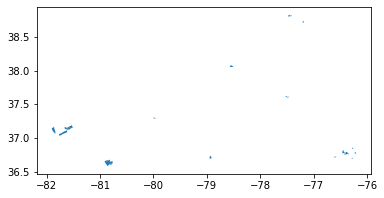

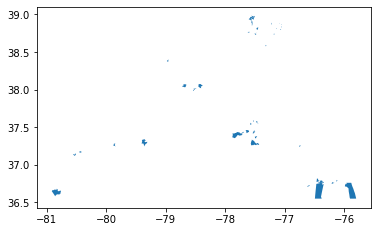

In [131]:
final[final['unique_id_2'].isin(set(final['unique_id_2']) - set(overlay_w_shp['unique_id_2']))].plot()
overlay_w_shp['geometry'][overlay_w_shp['unique_id_2'].isin(set(overlay_w_shp['unique_id_2']) - set(final['unique_id_2']))].plot()

In [132]:
len(set(final.unique_id_1) - set(overlay.unique_id_1))

AttributeError: 'GeoDataFrame' object has no attribute 'unique_id_1'

In [133]:
len(set(final.unique_id) - set(overlay.unique_id))

24

In [134]:
final.unique_id.nunique()

2435

In [135]:
len(set(df_with_absentee_reallocated.unique_id_1) - set(overlay.unique_id_1))

AttributeError: 'GeoDataFrame' object has no attribute 'unique_id_1'

In [136]:
len(set(overlay.unique_id_1) - set(df_with_absentee_reallocated.unique_id_1))

AttributeError: 'GeoDataFrame' object has no attribute 'unique_id_1'

In [137]:
overlay_mismatch = overlay[overlay['unique_id_1'].isin(list(set(overlay.unique_id_1) - set(final.unique_id_1)))]
overlay_mismatch.plot()

KeyError: 'unique_id_1'

In [138]:
set(df_with_absentee_reallocated.unique_id_1) - set(overlay.unique_id_1)

AttributeError: 'GeoDataFrame' object has no attribute 'unique_id_1'

In [139]:
overlay[overlay.unique_id_1 == '710511-3'].plot() #looks like it could be bottom sliver of final id
final[final['unique_id_1'] == '710511-2'].plot()

AttributeError: 'GeoDataFrame' object has no attribute 'unique_id_1'

In [140]:
final[final['unique_id_1'].isin(list(set(final.unique_id_1) - set(overlay.unique_id_1)))].plot()
overlay[overlay['unique_id_1'].isin(list(set(overlay.unique_id_1) - set(final.unique_id_1)))].plot()

AttributeError: 'GeoDataFrame' object has no attribute 'unique_id_1'

In [141]:
overlay.unique_id_1.nunique()

AttributeError: 'GeoDataFrame' object has no attribute 'unique_id_1'

In [142]:
set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1']) 

{'059925-11', '550019-3', '550045-3', '800403-3'}

<AxesSubplot:>

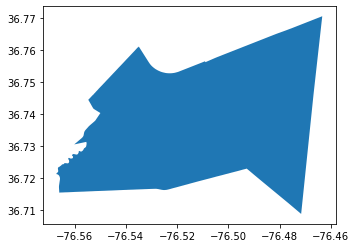

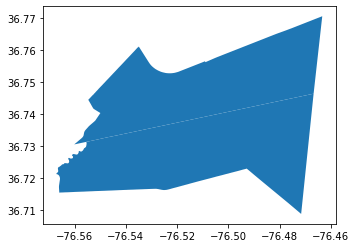

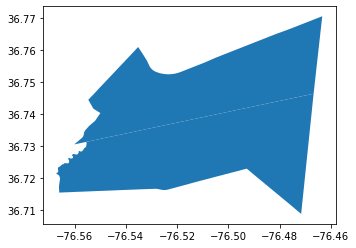

In [143]:
shp[(shp['unique_id'] == '800302')].plot() 
overlay[(overlay['unique_id'] == '800302')].plot() 
final[final['unique_id'] == '800302'].plot()

In [144]:
shp_need_cd_for_match = shp[shp['unique_id'].isin(list(set(shp.unique_id) - set(final.unique_id_2)))]

<AxesSubplot:>

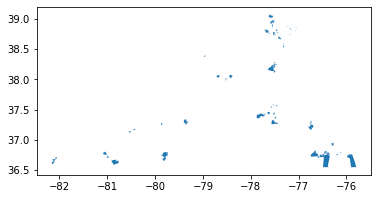

In [145]:
overlay_spec_shp_and_cd = gpd.overlay(cd, shp_need_cd_for_match, how = 'intersection', make_valid = True, keep_geom_type = True)
overlay_spec_shp_and_cd.plot()

In [146]:
overlay_spec_shp_and_cd.head()

,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,...,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,unique_id,geometry
0,51,121,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,None,B-3 part 2,90,N,None,G5240,121032,"MULTIPOLYGON Z (((-80.51902 37.13251 0.00000, ..."
1,51,750,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,None,New River Precinct,90,N,None,G5240,750004,"POLYGON Z ((-80.54193 37.14171 0.00000, -80.53..."
2,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,None,Berkeley D Part 1,90,S,None,G5240,095041,"POLYGON Z ((-76.72475 37.17928 0.00000, -76.72..."
3,51,095,01,O,Congressional District 1,C2,Y,None,None,None,...,None,None,None,Roberts D,90,N,None,G5240,095504,"POLYGON Z ((-76.74687 37.23813 0.00000, -76.74..."
4,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,None,Roberts D,90,N,None,G5240,095504,"POLYGON Z ((-76.69731 37.20970 0.00000, -76.70..."


In [147]:
overlay_spec_shp_and_cd['unique_id_2'] = overlay_spec_shp_and_cd['COUNTYFP_1'] + overlay_spec_shp_and_cd['VTDST'].str.slice(start = 3) + '-' +overlay_spec_shp_and_cd['CDFP'].str.lstrip('0')
overlay_spec_shp_and_cd.head()

,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,...,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,unique_id,geometry,unique_id_2
0,51,121,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,B-3 part 2,90,N,None,G5240,121032,"MULTIPOLYGON Z (((-80.51902 37.13251 0.00000, ...",121032-9
1,51,750,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,New River Precinct,90,N,None,G5240,750004,"POLYGON Z ((-80.54193 37.14171 0.00000, -80.53...",750004-9
2,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,Berkeley D Part 1,90,S,None,G5240,095041,"POLYGON Z ((-76.72475 37.17928 0.00000, -76.72...",095041-2
3,51,095,01,O,Congressional District 1,C2,Y,None,None,None,...,None,None,Roberts D,90,N,None,G5240,095504,"POLYGON Z ((-76.74687 37.23813 0.00000, -76.74...",095504-1
4,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,Roberts D,90,N,None,G5240,095504,"POLYGON Z ((-76.69731 37.20970 0.00000, -76.70...",095504-2


In [148]:
len(set(overlay_spec_shp_and_cd['unique_id_2']) - set(set(final.unique_id_2) - set(shp.unique_id)))

52

## Join election results and shapefile

<AxesSubplot:>

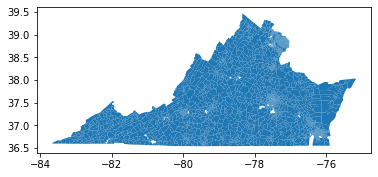

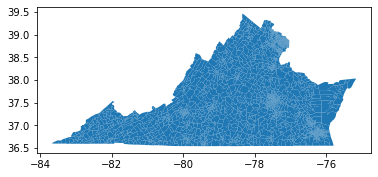

In [149]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, overlay_w_shp, on = 'unique_id_2', how = 'inner'), crs = proj)
join.plot()
final.plot()

In [150]:
join.shape

(2482, 85)

# Validation

## Shapefile validation

In [151]:
shp_final_merge = pd.merge(join, final, on = 'unique_id_2', how = 'inner', suffixes = ['_x', '_y'],indicator=True)
shp['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0        True
1        True
2        True
3        True
4        True
        ...  
2456    False
2457    False
2458    False
2459    False
2460    False
Length: 2461, dtype: bool

In [152]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=final.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=final.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    2401
True       80
dtype: int64


1) For 301 - South difference in area is 2.47207267955882
2) For 401 - Central difference in area is 2.47207267955882
3) For 102 - Catlett difference in area is 34.62920139219979
4) For 301 - Morrisville difference in area is 20.080055712719812
5) For 303 - Bealeton difference in area is 3.4520214333818875
6) For 201 - Beaverdam difference in area is 1.208716033666942
7) For 202 - Blunts difference in area is 1.2087160336624603
8) For 206 - Coles difference in area is 1.721759744943292
9) For 214 - Lucasville difference in area is 2.5304133461713483
10) For 310 - Forest Park difference in area is 22.266825275876144
11) For 411 - Mullen difference in area is 1.0487054150253776
12) For 106 - Zion Grace difference in area is 4.058967420435101
13) For 406 - Barron Black difference in area is 1.2909710180304899
14) For 31 - Sigma difference in area is 31.506885708476574
15) For 5 - Crestwood difference in area is 1.1974209947961376
16) For 15 - B M Williams difference in area is 1.146580039

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 304 - Winfrees Store difference in area is 7.916663970014204
23) For 201 - Jack Jouett difference in area is 1.6392619510377389
24) For 504 - Free Bridge difference in area is 3.6426457486026322
25) For 604 - Brownsville difference in area is 2.571403443031483
26) For 701 - Goode Vol Rescue Squad difference in area is 12.317696909654515
27) For 703 - Thaxton Baptist Church #2 difference in area is 12.639827910778957
28) For 103 - Casanova difference in area is 12.147699198142174
29) For 801 - South Boston East difference in area is 1.6422049028742618
30) For 603 - Ridgeway #1 difference in area is 10.277193975488686
31) For 5 - Madison difference in area is 1.2889583355036323
32) For 8 - Criglersville difference in area is 1.3961925125723342
33) For 101 - Farmville difference in area is 2.4946646019708445
34) For 201 - Lockett difference in area is 2.9363555643567
35) For 301 - Leigh difference in area is 2.9322856710127154
36) For 502 - Buffalo Hts difference in area is 2.2936

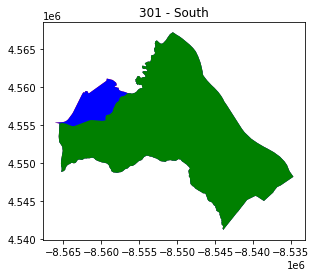

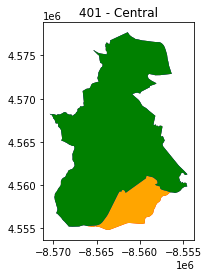

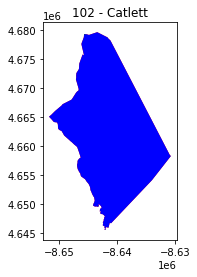

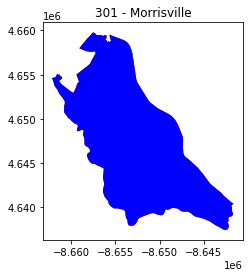

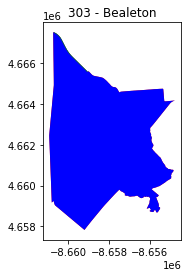

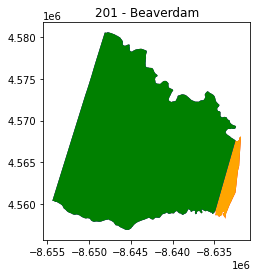

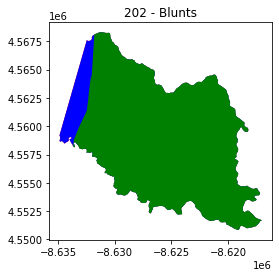

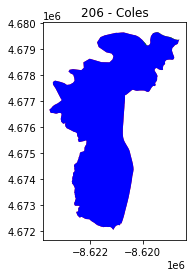

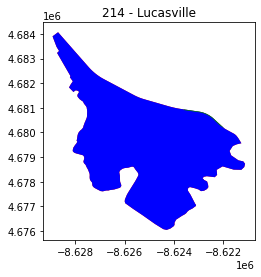

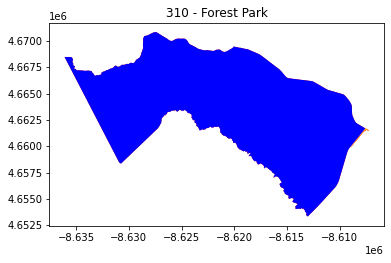

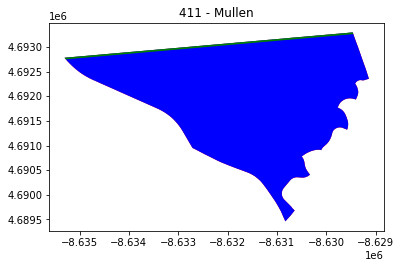

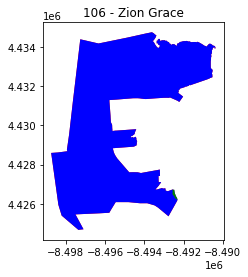

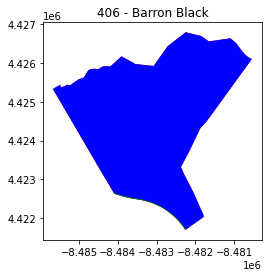

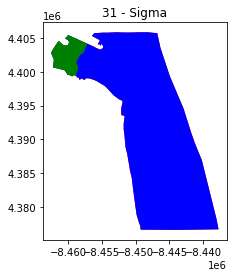

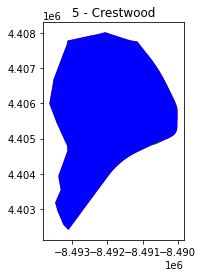

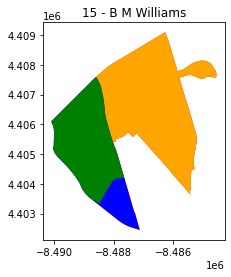

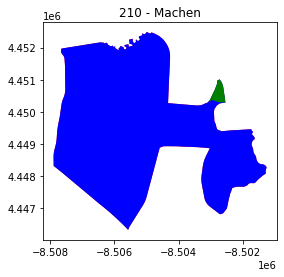

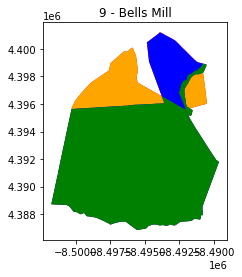

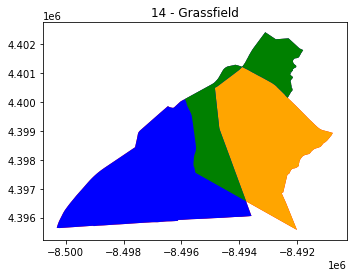

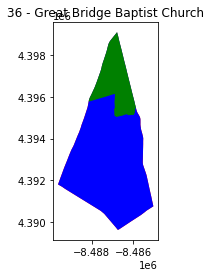

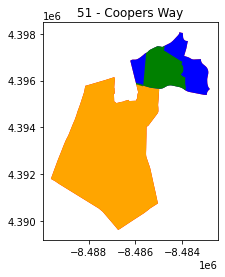

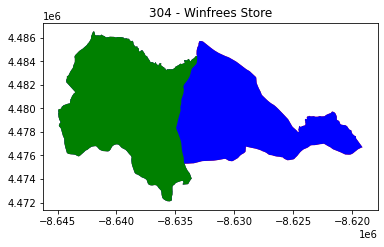

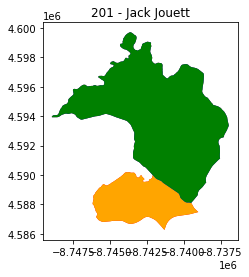

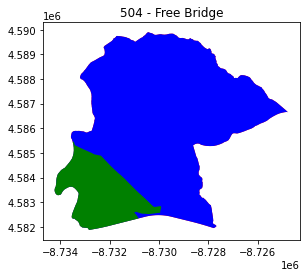

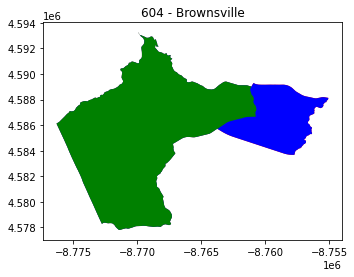

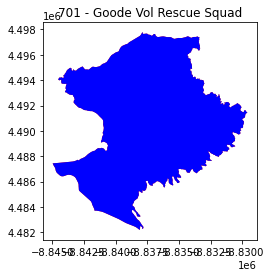

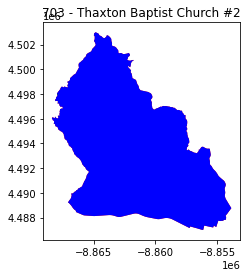

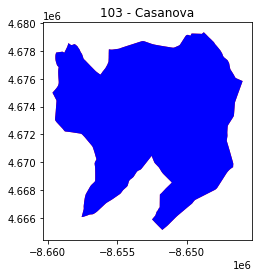

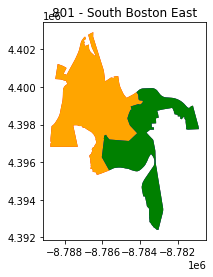

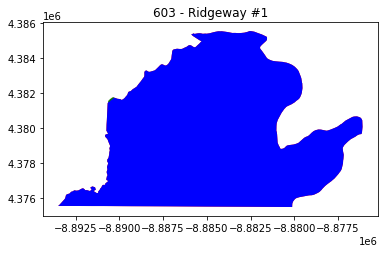

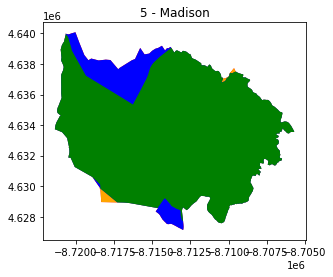

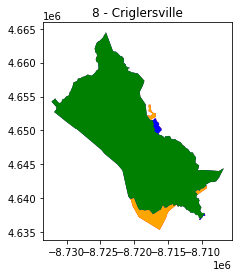

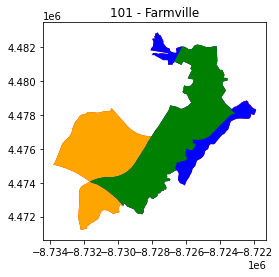

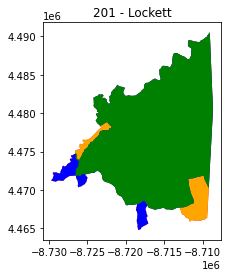

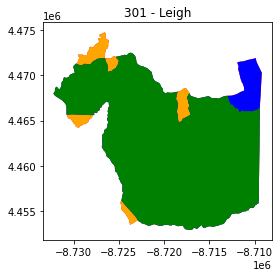

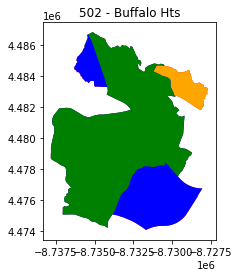

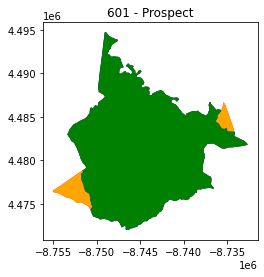

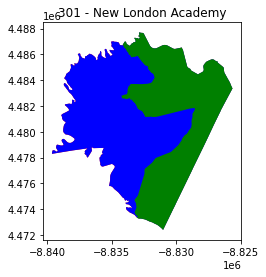

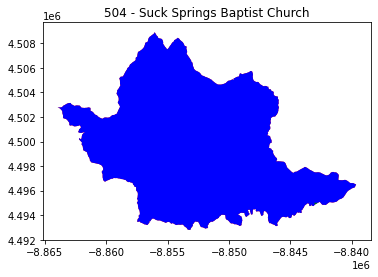

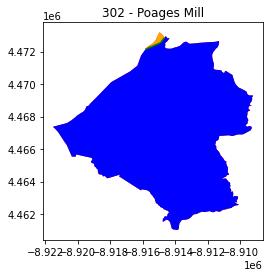

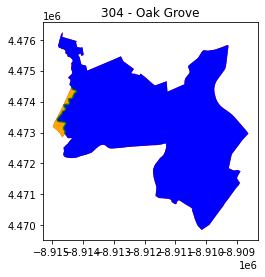

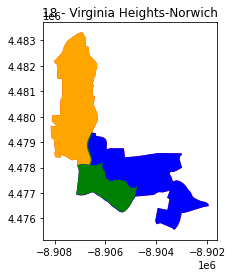

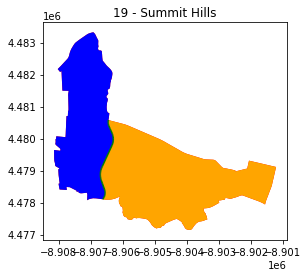

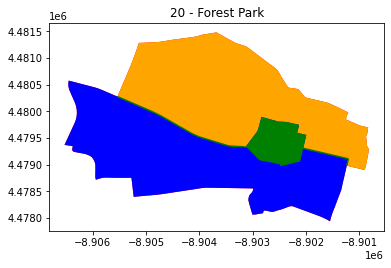

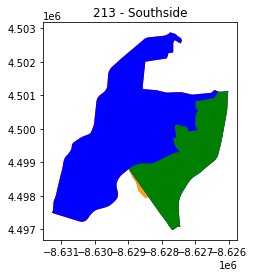

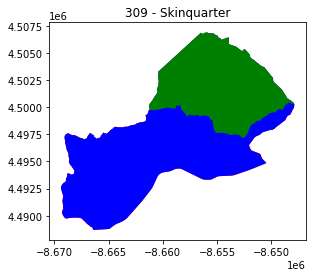

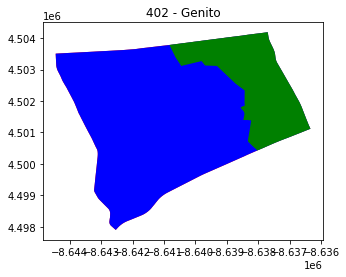

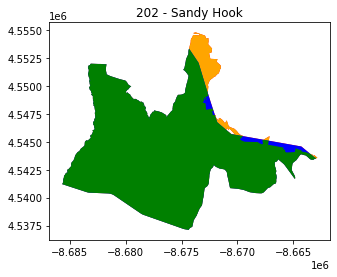

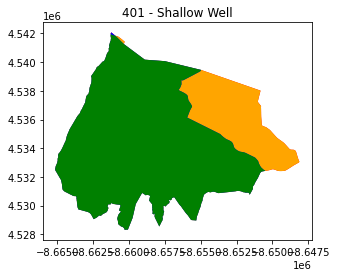

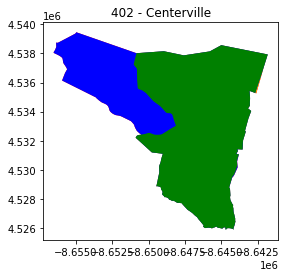

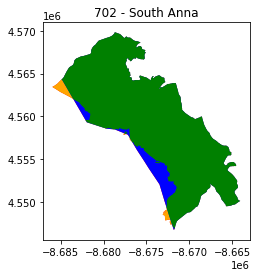

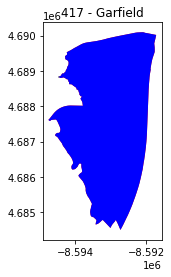

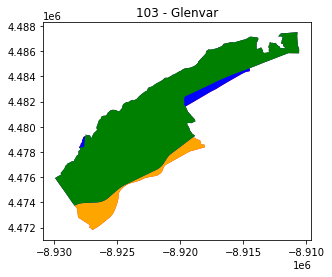

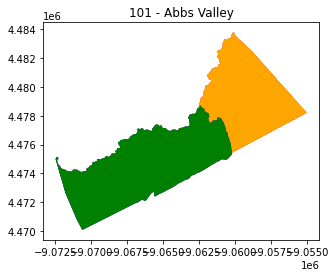

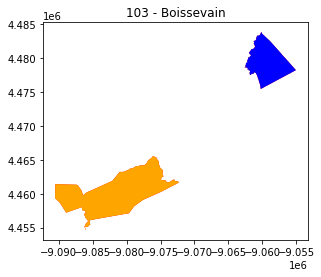

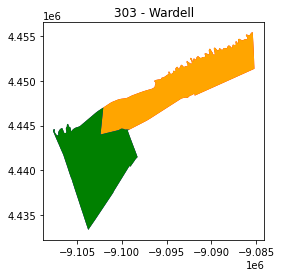

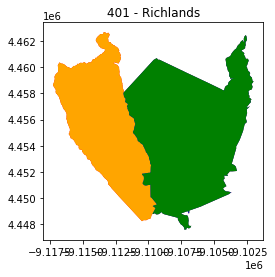

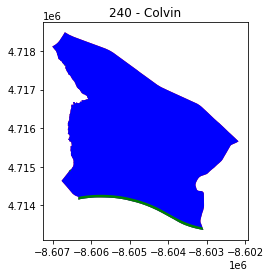

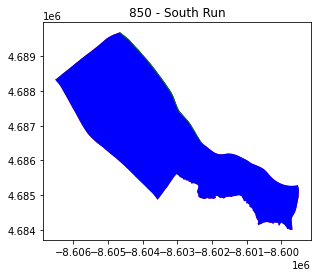

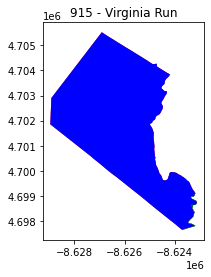

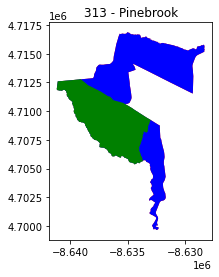

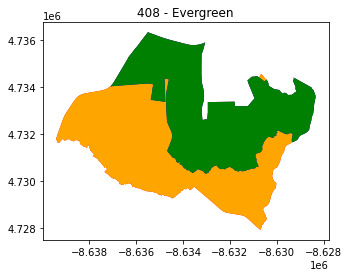

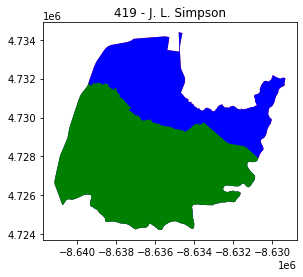

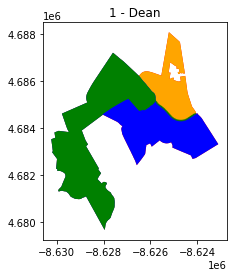

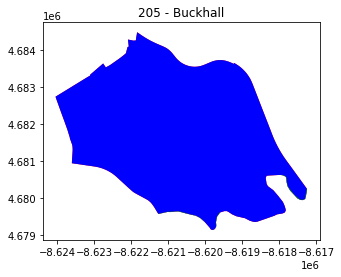

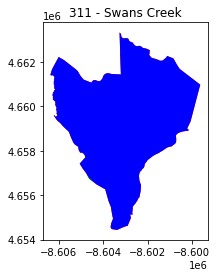

In [153]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [154]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2481, 1)
1747 precincts w/ a difference of 0 km^2
544 precincts w/ a difference between 0 and .1 km^2
85 precincts w/ a difference between .1 and .5 km^2
39 precincts w/ a difference between .5 and 1 km^2
25 precincts w/ a difference between 1 and 2 km^2
25 precincts w/ a difference between 2 and 5 km^2
16 precincts w/ a difference greater than 5 km^2


## Precint level election result check

In [ ]:
set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1)

In [ ]:
final_df_merge = pd.merge(df_with_absentee_reallocated, final, how = 'inner', on = 'unique_id_1')

In [ ]:
col_list = ['G16HORREP', 'G16HORDEM', 'G16HORIND', 'G16HORWRI']

In [ ]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["Pct"]), "(V)","{:.>5}".format(int(df.iloc[j][right_Data]))," (S){:.>5}".format(int(df.iloc[j][left_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["Pct"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["Pct"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [ ]:
validater_row(final_df_merge, col_list)

In [ ]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

In [ ]:
final.unique_id_2.nunique()

In [ ]:
final.shape

In [ ]:
final_join_shp_merge = pd.merge(join, final, how = 'inner', on = 'unique_id_2')

In [ ]:
final_join_shp_merge.shape

In [ ]:
validater_row(final_join_shp_merge, col_list)

In [ ]:
final_df_merge_2 = pd.merge(df_with_absentee_reallocated, final, on = 'unique_id_2')

In [ ]:
validater_row(final_df_merge_2, col_list)